
## Text preprocessing & exploration
1) rating distribution

2) nltk: words count per review, tokenization, lemmatization, stopwords removal

3) wordcloud (most popular tokens)

4) textblob for ner + function for frequency display (adj, adv, verbs, nouns)

5) nltk ngrams (2,3)

6) textblob (noun phrases)

7) topic modeling (lda + Bert Topic)

## Sentiment analysis

1) Textblob

2) Vader

3) Ekman - emotion detection

4) BERT - transformer pipeline (distil bert uncased)

In [1]:
!pip install spacy

In [2]:
import pandas as pd
import spacy
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import nltk

In [3]:
df = pd.DataFrame(pd.read_excel('file.xlsx', sheet_name = 'Kamara'))

In [4]:
df.head()

rating                                             review
0       3  Just beside the road lies this small but nice ...
1       5  See it whist you can! Caused/formed by rock er...
2       5  Kamara Tou Koraka is a gem in the Cape Greco F...
3       5  You should not visit only for this place but i...
4       3  It is a cool place to see but so many tourists...

In [5]:
df.shape

(500, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rating  500 non-null    int64 
 1   review  500 non-null    object
dtypes: int64(1), object(1)
memory usage: 7.9+ KB


<Axes: xlabel='rating', ylabel='count'>

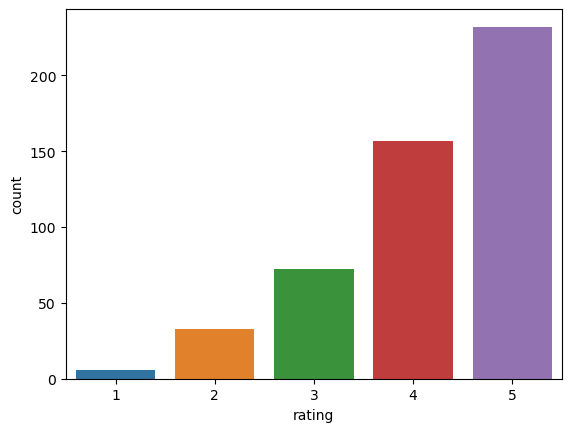

In [7]:
sns.countplot(x = df.rating)

In [8]:
perc_share = df.rating.value_counts(normalize = True).round(2)
print(perc_share)

5    0.46
4    0.31
3    0.14
2    0.07
1    0.01
Name: rating, dtype: float64


## Rating conclusions:

1) Overwhelming majority of reviews is marked with the highest grade (46%), which is 5.

2) 77% of dataset is either marked with 5, or with 4.

3) Grades below 3 almost do not exist in the dataset - they are 7% and 1%.

4) **It can be expected that reviews would be extremely positive.**

# Text work

## Text preprocessing

In [4]:
df["words_count"] = df.review.apply(lambda n: len(n.split()))
print(df.head())

   rating                                             review  words_count
0       3  Just beside the road lies this small but nice ...           34
1       5  See it whist you can! Caused/formed by rock er...           44
2       5  Kamara Tou Koraka is a gem in the Cape Greco F...           38
3       5  You should not visit only for this place but i...           84
4       3  It is a cool place to see but so many tourists...           25


C:\Users\Larysa\AppData\Local\Temp\ipykernel_7848\2575719658.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(list(df.words_count))


Text(0.5, 0, 'Words Count')

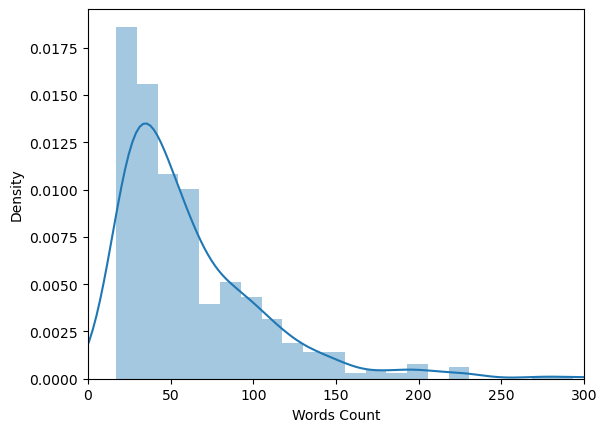

In [5]:
sns.distplot(list(df.words_count))
plt.xlim([0, 300]);
plt.xlabel("Words Count")

In [6]:
text = str(df.review)

In [7]:
#text preprocess -> lemmatization and stopwords removal

import re

#stopwords vocab
lst_stopwords = nltk.corpus.stopwords.words("english")


def preprocess_text(text, flg_lemm=True, lst_stopwords=None):

    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())

    lst_text = text.split()
  
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in lst_stopwords]
                
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    text = " ".join(lst_text)
    return text

df["review_clean"] = df["review"].apply(lambda x: preprocess_text(x, 
                                                                 flg_lemm=True, 
                                                                 lst_stopwords=lst_stopwords))
df.head()

rating                                             review  words_count  \
0       3  Just beside the road lies this small but nice ...           34   
1       5  See it whist you can! Caused/formed by rock er...           44   
2       5  Kamara Tou Koraka is a gem in the Cape Greco F...           38   
3       5  You should not visit only for this place but i...           84   
4       3  It is a cool place to see but so many tourists...           25   

                                        review_clean  
0  beside road lie small nice natural bridge seen...  
1  see whist causedformed rock erosion amazing si...  
2  kamara tou koraka gem cape greco family natura...  
3  visit place instead complete tour cape greko p...  
4  cool place see many tourist longer feel like n...

In [8]:
!pip install wordcloud

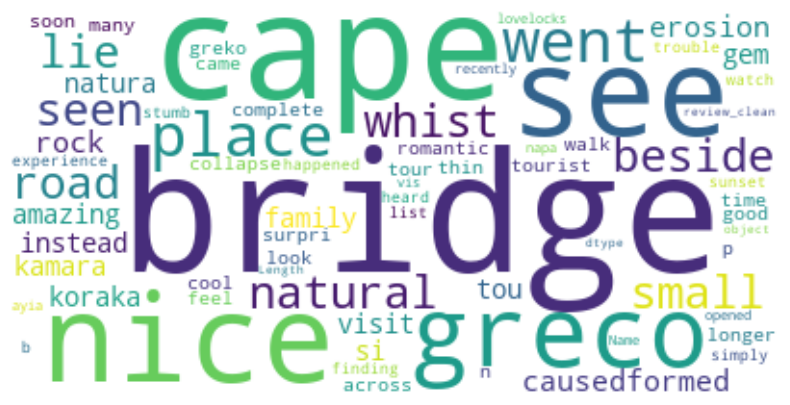

In [9]:
from wordcloud import WordCloud
text = str(df.review_clean)

plt.figure(figsize=(10,5))
wordcloud = WordCloud(background_color = "white", prefer_horizontal = 1 ).generate(text)
plt.imshow(wordcloud, interpolation="bilinear",)
plt.axis("off")
plt.show()

In [10]:
#tokenization and pos

df['tokens'] = df.apply(lambda row:  nltk.word_tokenize(row["review_clean"]), axis=1)
df['tags'] = df.apply(lambda row: nltk.pos_tag(row["tokens"]), axis=1)
df.head()

rating                                             review  words_count  \
0       3  Just beside the road lies this small but nice ...           34   
1       5  See it whist you can! Caused/formed by rock er...           44   
2       5  Kamara Tou Koraka is a gem in the Cape Greco F...           38   
3       5  You should not visit only for this place but i...           84   
4       3  It is a cool place to see but so many tourists...           25   

                                        review_clean  \
0  beside road lie small nice natural bridge seen...   
1  see whist causedformed rock erosion amazing si...   
2  kamara tou koraka gem cape greco family natura...   
3  visit place instead complete tour cape greko p...   
4  cool place see many tourist longer feel like n...   

                                              tokens  \
0  [beside, road, lie, small, nice, natural, brid...   
1  [see, whist, causedformed, rock, erosion, amaz...   
2  [kamara, tou, koraka, gem, cape, greco, family...   
3  [visit, place, instead, complete, tour, cape, ...   
4  [cool, place, see, many, tourist, longer, feel...   

                                                tags  
0  [(beside, RB), (road, NN), (lie, NN), (small, ...  
1  [(see, VB), (whist, NN), (causedformed, VBN), ...  
2  [(kamara, NN), (tou, NN), (koraka, NN), (gem, ...  
3  [(visit, NN), (place, NN), (instead, RB), (com...  
4  [(cool, JJ), (place, NN), (see, VBP), (many, J...

In [11]:
!pip install textblob

In [12]:
# functions for separating the POS Tags
from textblob import TextBlob

def adjectives(text):
    blob = TextBlob(text)
    return [word for (word,tag) in blob.tags if tag == 'JJ']
def verbs(text):
    blob = TextBlob(text)
    return [word for (word,tag) in blob.tags if tag.startswith('VB')]
def adverbs(text):
    blob = TextBlob(text)
    return [word for (word,tag) in blob.tags if tag.startswith('RB')]
def nouns(text):
    blob = TextBlob(text)
    return [word for (word,tag) in blob.tags if tag.startswith('NN')]

df['Adjectives'] = df['review_clean'].apply(adjectives)
df['Verbs'] = df['review_clean'].apply(verbs)
df['Adverbs'] = df['review_clean'].apply(adverbs)
df['Nouns'] = df['review_clean'].apply(nouns)
df[['tags', 'Adjectives', 'Verbs', 'Adverbs', 'Nouns']].head()

tags  \
0  [(beside, RB), (road, NN), (lie, NN), (small, ...   
1  [(see, VB), (whist, NN), (causedformed, VBN), ...   
2  [(kamara, NN), (tou, NN), (koraka, NN), (gem, ...   
3  [(visit, NN), (place, NN), (instead, RB), (com...   
4  [(cool, JJ), (place, NN), (see, VBP), (many, J...   

                                          Adjectives  \
0             [small, nice, natural, several, worth]   
1                                   [last, possible]   
2                        [natural, great, difficult]   
3  [complete, close, blue, maximum, protective, g...   
4                                       [cool, many]   

                                               Verbs                  Adverbs  \
0                                       [seen, stop]   [beside, nevertheless]   
1  [see, causedformed, amazing, saw, advised, ama...    [forever, first, ago]   
2                     [greco, preserved, find, walk]                   [well]   
3         [cave, bridge, spend, taking, walk, break]  [instead, away, really]   
4                              [see, feel, roadside]                 [longer]   

                                               Nouns  
0  [road, lie, bridge, world, aruba, aussie, beau...  
1  [whist, rock, erosion, site, wont, year, walk,...  
2  [kamara, tou, koraka, gem, cape, family, wonde...  
3  [visit, place, tour, cape, greko, park, visit,...  
4      [place, tourist, nature, tourist, attraction]

In [18]:
# function for counting the pos frequency

from functools import reduce
import operator
import collections
from collections import Counter


#function to convert token to list and unpack 
def termfreq(x): 
    dlist = x.tolist() 
    return (reduce(operator.add, dlist))


def counting(x, y):
    most_occurrences = Counter(x).most_common()
    count_df = pd.DataFrame(most_occurrences, columns = ['Word', 'Count'])
    display(count_df.head(10))

In [19]:
counting(termfreq(df.Adjectives), 2)

Word  Count
0  beautiful    125
1       nice    117
2      great    112
3     pebble     86
4      small     77
5  aphrodite     75
6      worth     74
7       good     71
8     little     44
9       busy     40

In [20]:
counting(termfreq(df.Adverbs), 2)

Word  Count
0  really     73
1  lovely     71
2    also     68
3    well     60
4   quite     44
5    back     39
6  pebbly     31
7    even     30
8   still     28
9  pretty     27

In [21]:
counting(termfreq(df.Verbs), 2)

Word  Count
0       go    108
1      see    106
2     take     73
3      get     71
4     make     43
5     went     41
6  amazing     34
7  parking     31
8    beach     30
9     walk     28

In [22]:
counting(termfreq(df.Nouns), 2)

Word  Count
0    rock    387
1   beach    314
2   place    215
3     sea    158
4    view    155
5  bridge    139
6    road    137
7   water    129
8   visit    110
9     car    110

In [23]:
counting(termfreq(df.tags), 2)                                    

Word  Count
0       (rock, NN)    385
1      (beach, NN)    314
2      (place, NN)    215
3        (sea, NN)    158
4       (view, NN)    155
5     (bridge, NN)    139
6       (road, NN)    137
7      (water, NN)    129
8  (beautiful, JJ)    125
9       (nice, JJ)    117

In [24]:
#most frequent ngrams
import nltk
from nltk.util import ngrams

def extract_ngrams(text, num):
    n_grams = ngrams(nltk.word_tokenize(text), num)
    return [ ' '.join(grams) for grams in n_grams]

In [25]:
extract_ngrams(text,num = 2)[:10]

['0 beside',
 'beside road',
 'road lie',
 'lie small',
 'small nice',
 'nice natural',
 'natural bridge',
 'bridge seen',
 'seen ...',
 '... 1']

In [26]:
extract_ngrams(text,num = 3)[:10]

['0 beside road',
 'beside road lie',
 'road lie small',
 'lie small nice',
 'small nice natural',
 'nice natural bridge',
 'natural bridge seen',
 'bridge seen ...',
 'seen ... 1',
 '... 1 see']

In [27]:
# noun phrases

text_blob_object = TextBlob(str(df['review_clean']))
for noun_phrase in text_blob_object.noun_phrases:
    print(noun_phrase)

road lie
rock erosion
amazing si ...
kamara tou koraka gem cape greco family natura ...
visit place
complete tour cape greko p ...
cool place
n ... ...
thin look
collapse time
good ...
cape greco
nice surpri ...
romantic experience
b ...
list trouble
stumb ...
ayia napa vis ...
name
length


## Topic modelling 

source: https://www.kaggle.com/code/thebrownviking20/topic-modelling-with-spacy-and-scikit-lear

### LDA
a text is the mixture of topics and, therefore, topics are mixture of different sets of keywords

the goal is to specify the probable density of both topics and tokens based on latent (hidden) patterns to be discovered


In [28]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE

In [29]:
#converting the text to numerical vectors based on frequency

vectorizer = CountVectorizer() 
data_vectorized = vectorizer.fit_transform(df.review_clean)

In [30]:
NUM_TOPICS = 3

In [31]:
lda = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=10, learning_method='online',verbose=True)
data_lda = lda.fit_transform(data_vectorized)

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


In [32]:
# Functions for printing keywords for each topic
def selected_topics(model,vectorizer,top_n=5):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names_out()[i], topic[i])
                        for i in topic.argsort()[:-top_n - 1:-1]]) 

In [33]:
print("LDA Model:")
selected_topics(lda, vectorizer) #displaying the topic keywords

LDA Model:
Topic 0:
[('beach', 167.03764657102917), ('rock', 141.1891620228752), ('view', 84.44986724050055), ('place', 76.50611042696478), ('visit', 75.6825419292706)]
Topic 1:
[('rock', 245.64895739193486), ('beach', 177.87312306125548), ('place', 117.6541464475972), ('aphrodite', 95.93118222556039), ('sea', 75.3626914930394)]
Topic 2:
[('bridge', 139.36810812253705), ('love', 58.4612225449348), ('nice', 43.26343579682537), ('walk', 31.29023316163849), ('natural', 29.095770331262887)]


## Bert Topic Model

https://maartengr.github.io/BERTopic/index.html#variations

In [13]:
!pip install transformers

In [14]:
!pip install bertopic

In [15]:
from bertopic import BERTopic

topic_model = BERTopic(nr_topics = 7)
topics, probs = topic_model.fit_transform(df.review_clean)

In [16]:
topic_model.get_topic_info()

Topic  Count                           Name
0     -1    190        -1_rock_beach_place_sea
1      0     66  0_cyprus_rock_place_aphrodite
2      1    115       1_beach_rock_road_pebble
3      2     37   2_water_beach_swim_beautiful
4      3     23  3_sunset_romantic_place_photo
5      4     32    4_bridge_natural_arch_fence
6      5     37     5_bridge_love_lock_padlock

In [38]:
topic_model.generate_topic_labels()

['-1_rock_place_aphrodite', '0_beach_rock_bridge', '1_cyprus_rock_place']

In [39]:
topic_model.get_topic(0)

[('beach', 0.06788255285840013),
 ('rock', 0.06298826242615876),
 ('bridge', 0.04396551776028283),
 ('view', 0.03880446620121231),
 ('sea', 0.03847818910614264),
 ('place', 0.03666747587587401),
 ('road', 0.034164345610362405),
 ('nice', 0.03401475001682411),
 ('water', 0.03345101026082057),
 ('great', 0.031423190925514426)]

In [17]:
topic_model.visualize_barchart()

# Sentiment Analysis

## Text Blob

TextBlob algorithm is lexicon-based automated solution for sentiment anal-ysis called ‘en-sentiment-xlm’ . Each word, expect from stop words, is assigned to respectful part of speech tag (POS) and integer values of polarity degree, sub-jectivity degree, intensity degree and confidence degree. Then a weighted average score over the all values is calculated in order to compute the valuable polarity and subjectivity degree .  Despite of being lexicon-based approach by default, TextBlob is still being considered as an automated tool due to the fact that it has the ability to learn sentiment from labeled data using machine learning classification methods .

In [41]:
#polarity of the review

df['textblob'] = df['review_clean'].map(lambda text: TextBlob(text).sentiment.polarity)
df[['review_clean','textblob']].head()

review_clean  textblob
0  beside road lie small nice natural bridge seen...     0.150
1  see whist causedformed rock erosion amazing si...     0.290
2  kamara tou koraka gem cape greco family natura...     0.325
3  visit place instead complete tour cape greko p...    -0.075
4  cool place see many tourist longer feel like n...     0.425

In [42]:
#subjectivity of the review
df['tb_subjectivity'] = df['review_clean'].apply(lambda text: TextBlob(text).sentiment.subjectivity)
print(df[['review_clean','textblob', 'tb_subjectivity']].head())

                                        review_clean  textblob  \
0  beside road lie small nice natural bridge seen...     0.150   
1  see whist causedformed rock erosion amazing si...     0.290   
2  kamara tou koraka gem cape greco family natura...     0.325   
3  visit place instead complete tour cape greko p...    -0.075   
4  cool place see many tourist longer feel like n...     0.425   

   tb_subjectivity  
0           0.3800  
1           0.6400  
2           0.7875  
3           0.4000  
4           0.5750  


In [43]:
'''
When a sentence is passed into Textblob it gives two outputs, which are polarity and subjectivity. 
Polarity is the output that lies between [-1,1], where -1 refers to negative sentiment and +1 refers to positive sentiment. 
Subjectivity is the output that lies within [0,1] and refers to personal opinions and judgments.
'''

# conversion of the decimals in order to make it more user-friendly

def sentiment_label(x):
    if (x < -0.5):
        return 'negative'
    
    if (x >= -0.5 and x < 0.5 ):
        return 'neutral'
    
    if (x >= 0.5 and x<=1):
        return 'positive'
    

df['sentiment_textblob'] = df.textblob.apply(sentiment_label)
print(df[['review_clean','sentiment_textblob']].head())

                                        review_clean sentiment_textblob
0  beside road lie small nice natural bridge seen...            neutral
1  see whist causedformed rock erosion amazing si...            neutral
2  kamara tou koraka gem cape greco family natura...            neutral
3  visit place instead complete tour cape greko p...            neutral
4  cool place see many tourist longer feel like n...            neutral


<Axes: >

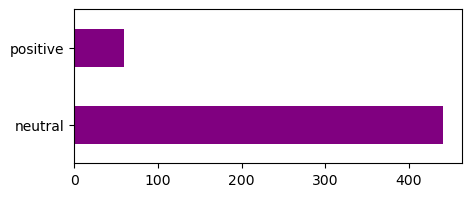

In [44]:
plt.figure(figsize=(5,2))
df['sentiment_textblob'].value_counts().plot.barh(x='index', y='sentiment_textblob', color="purple")

In [45]:
df['sentiment_textblob'].value_counts()

neutral     441
positive     59
Name: sentiment_textblob, dtype: int64

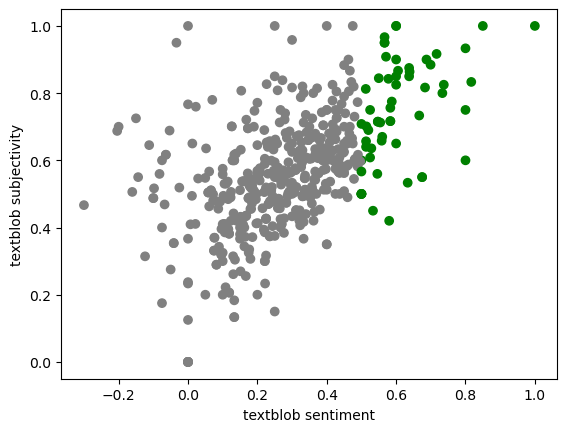

In [46]:
x_axis = df["textblob"]
y_axis = df["tb_subjectivity"]

fig, ax = plt.subplots()


colors = {"positive": "green", "neutral": "grey", "negative": "red"}

ax.scatter(x_axis, y_axis, c=df["sentiment_textblob"].map(colors))

plt.xlabel("textblob sentiment")
plt.ylabel("textblob subjectivity")
plt.show()

<Axes: title={'center': 'neutral'}>

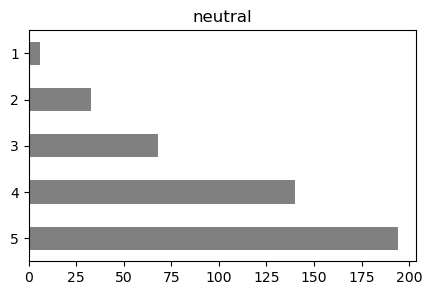

In [47]:
#sentiment vs rating

plt.figure(figsize=(5,3))

df_neutral = df.loc[df['sentiment_textblob'] == "neutral", 'rating']
df_neutral.value_counts().plot.barh(x='index', y='rating', color="grey", title = "neutral")

<Axes: title={'center': 'positive'}>

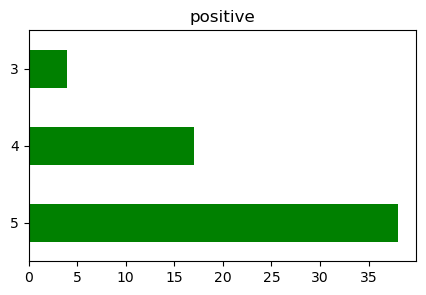

In [48]:
plt.figure(figsize=(5,3))

df_neutral = df.loc[df['sentiment_textblob'] == "positive", 'rating']
df_neutral.value_counts().plot.barh(x='index', y='rating', color="green", title = "positive")

In [49]:
df.loc[(df['sentiment_textblob'] == "positive") & (df["rating"]==3), "review_clean"]

18     great view sea natural phenomenon beautiful vi...
253    pleasant distraction winter hour cover visit n...
479    somewhere put padlock cement love lot place br...
496    came across bridge walk cape greco nice surpri...
Name: review_clean, dtype: object

In [50]:
df.loc[(df['sentiment_textblob'] == "positive") & (df["rating"]==3), "review"][18]

'A great view of the sea and a natural phenomena. Here you have a beautiful view but you will be in a queue with a lot of people.\nUsed a lot as background for wedding pictures'

In [51]:
df.loc[(df['sentiment_textblob'] == "positive") & (df["rating"]==3), "review"][253]

'Pleasant distraction in the winter. An hour or so will cover any visit. Nice beach in summer but pebbly. Enjoyed it though and some great photo opportunities. It is like a trip out to Durdle Door.\nOne of those places that "you have to see" in Cyprus to avoid people asking why you didn\'t visit and can be reached by what I imagine would be a pleasant journey on public transport from Paphos.\nGood car park and nice café.'

In [52]:
df.loc[(df['sentiment_textblob'] == "positive") & (df["rating"]==3), "review"][479]

'Somewhere to put your padlock to cement your love. Lots of places have these bridges now. Guess it is ok for the love struck.'

In [53]:
df.loc[(df['sentiment_textblob'] == "positive") & (df["rating"]==3), "review"][496]

'We came across this bridge on our walk to Cape Greco and it was a nice surprise, lots of couples had engraved locks which was a nice touch, Not as popular of the same bridge in Paris, France but worth a visit with your partner at sunset :-)'

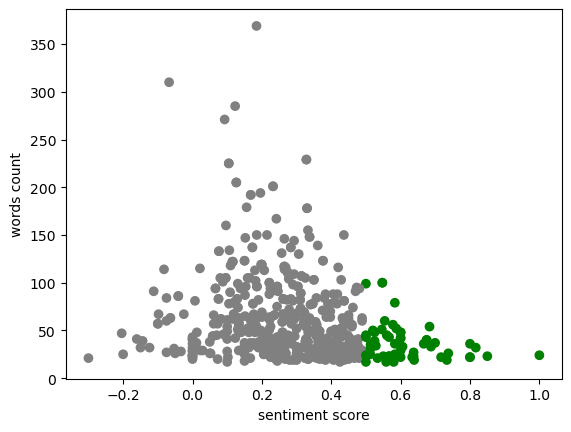

In [54]:
# checking how sentiment is related to review length

x_axis = df["textblob"]
y_axis = df["words_count"]

fig, ax = plt.subplots()

colors = {"positive": "green", "neutral": "grey", "negative": "red"}


ax.scatter(x_axis, y_axis, c=df["sentiment_textblob"].map(colors))

plt.xlabel("sentiment score")
plt.ylabel("words count")
plt.show()

kontekst kulturowy - tryb przypuszczający amerykanie i anglicy chętniej dają pozytywny feedback

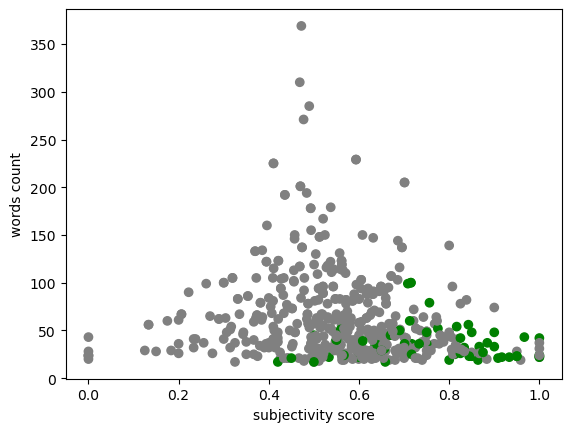

In [55]:
# checking how words count relates to subjectivity degree

y_axis = df["words_count"]
x_axis = df["tb_subjectivity"]

fig, ax = plt.subplots()

colors = {"positive": "green", "neutral": "grey", "negative": "red"}


ax.scatter(x_axis, y_axis, c=df["sentiment_textblob"].map(colors))

plt.xlabel("subjectivity score")
plt.ylabel("words count")
plt.show()

## Vader

Output of Vader algorithm contains of 4 elements (types of scores):

-	neg –  score for share of words listed as negative in Vader lexicon

-	neu – score  for share of words listed as neutral in Vader lexicon

-	pos – score for share of words listed as positive in Vader lexicon

-	compound – normalized weighted composite score, in other words, is fi-nal verdict for sentiment mode for particular piece of text, which is cal-culated by summing the neg, neu and pos scores and then normalized in range -1 (strongly negative) to 1 (strongly positive).

Score values aim to reflect the mood proportions present in the text sample . 


In [56]:
!pip install vaderSentiment

In [57]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

df['vader_output'] = df['review_clean'].map(lambda text: analyzer.polarity_scores(text))

In [58]:
df['vader_output'].head()

0    {'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com...
1    {'neg': 0.0, 'neu': 0.743, 'pos': 0.257, 'comp...
2    {'neg': 0.084, 'neu': 0.507, 'pos': 0.409, 'co...
3    {'neg': 0.076, 'neu': 0.856, 'pos': 0.068, 'co...
4    {'neg': 0.0, 'neu': 0.536, 'pos': 0.464, 'comp...
Name: vader_output, dtype: object

In [59]:
df['vader_output'][0]

{'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'compound': 0.6124}

In [60]:
# extracting the compound score to separate column

df['vader'] = df['vader_output'].apply(lambda score_dict: score_dict['compound'])
df["vader"].head()

0    0.6124
1    0.8225
2    0.8625
3   -0.0828
4    0.7783
Name: vader, dtype: float64

In [61]:
def vader_label(x):
    
    if (x < -0.5):
        return 'negative'
    
    if (x >= -0.5 and x < 0.5 ):
        return 'neutral'
    
    if (x >= 0.5 and x<=1):
        return 'positive'

df['vader_text'] = df["vader"].apply(vader_label)
print(df[['review_clean','sentiment_textblob', "vader_text"]].head())

                                        review_clean sentiment_textblob  \
0  beside road lie small nice natural bridge seen...            neutral   
1  see whist causedformed rock erosion amazing si...            neutral   
2  kamara tou koraka gem cape greco family natura...            neutral   
3  visit place instead complete tour cape greko p...            neutral   
4  cool place see many tourist longer feel like n...            neutral   

  vader_text  
0   positive  
1   positive  
2   positive  
3    neutral  
4   positive  


<Axes: >

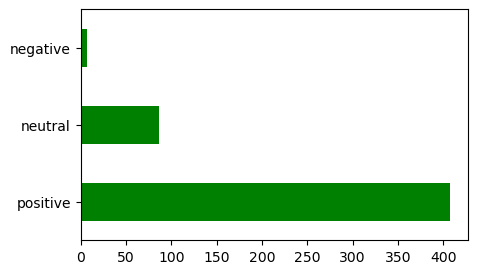

In [62]:
plt.figure(figsize=(5,3))
df['vader_text'].value_counts().plot.barh(x='index', y='vader_text', color="green")

In [63]:
df['sentiment_textblob'].value_counts()

neutral     441
positive     59
Name: sentiment_textblob, dtype: int64

In [64]:
df['vader_text'].value_counts()

positive    407
neutral      86
negative      7
Name: vader_text, dtype: int64

### Comparing the vader and textblob

In [65]:
corr = df['vader'].corr(df['textblob'])
corr

0.4266840595539761

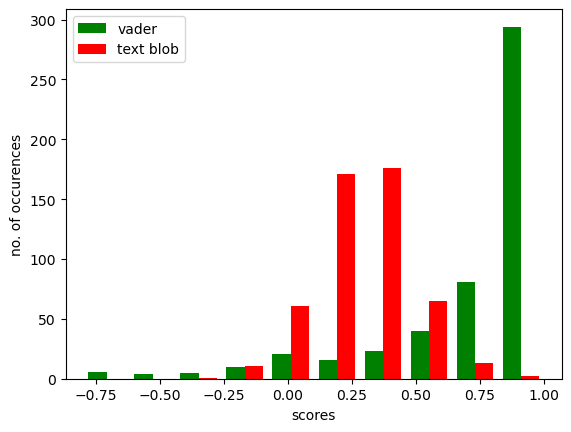

In [66]:
colors = ["green", "red"]
names = ["vader", "text blob"]

plt.hist([df['vader'], df["textblob"]], color=colors, label = names)
 
plt.xlabel('scores')
plt.ylabel('no. of occurences')
plt.legend()

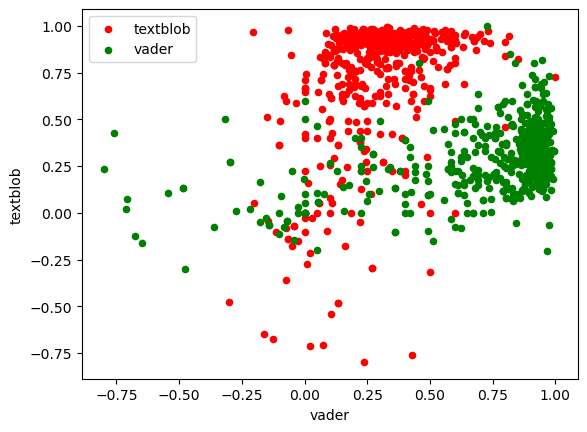

In [67]:
x_axis = df['vader']
y_axis = df["textblob"]



ax1=df.plot(kind='scatter', x="textblob", y="vader", color='red', label='textblob')

#add scatter plot on same graph using B_assists vs. B_points
ax2=df.plot(kind='scatter', x="vader", y="textblob", color='green', label='vader', ax=ax1)
 

#plt.title('Vader VS TextBlob')
#plt.xlabel('Vader')
#plt.ylabel('Textblob')
plt.show()

<Axes: title={'center': 'positive'}>

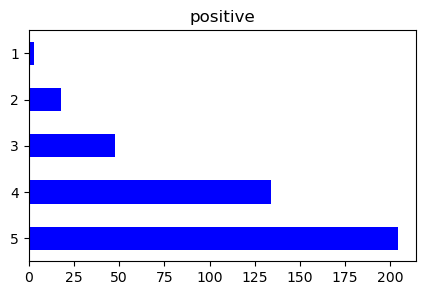

In [68]:
# vader vs ratings
plt.figure(figsize=(5,3))

df_vader_pos = df.loc[df['vader_text'] == "positive", 'rating']
df_vader_pos.value_counts().plot.barh(x='vader_text', y='rating', color="blue", title = "positive")

In [69]:
df.loc[(df['vader_text'] == "positive") & (df["rating"]==1), "review"]

37     Cycled around the sat Mac location for a good ...
421    The real love bridge is closer to the city abo...
480    We stumbled upon this place completely by acci...
Name: review, dtype: object

In [70]:
df["review"][480]

'We stumbled upon this place completely by accident. We had read about it and joked that it look pretty rubbish and this was exactly the case. If you like rickety, old, run down bridges then this is the place to visit. Clearly a tourist attraction that never really took off as its broken and vandalised. Old padlocks are attached to the bridge to represent love and I hope the people who attached their locks have love that has lasted longer than this smelly old bridge. Not a romantic location what so ever and I would definitely not advise taking your loved one here or popping the question at this love bridge !! 💔'

In [71]:
df["words_count"][480]

113

In [72]:
df["review"][421]

'The real love bridge is closer to the city about 300 meters to the west. This is just wooden small bridge'

In [73]:
df["review"][37]

'Cycled around the sat Mac location for a good hour- could not find it. The area is pretty apart from the plastic litter that ruins the island. I’m sure it’s great- just tough to find.'

In [74]:
list = [37, 421, 480]

for l in list:
    print(f"\n{df.vader_output[l]}")


{'neg': 0.162, 'neu': 0.457, 'pos': 0.381, 'compound': 0.802}

{'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'compound': 0.6369}

{'neg': 0.039, 'neu': 0.483, 'pos': 0.478, 'compound': 0.9892}


In [75]:
list = [37, 421, 480]

for l in list:
    print(f"\n{df.sentiment_textblob[l]}")


neutral

neutral

neutral


<Axes: title={'center': 'neutral'}>

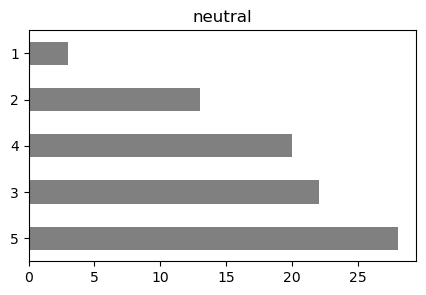

In [76]:
plt.figure(figsize=(5,3))

df_vader_neu = df.loc[df['vader_text'] == "neutral", 'rating']
df_vader_neu.value_counts().plot.barh(x='vader_text', y='rating', color="grey", title = "neutral")

In [77]:
indexes = df.index[(df['rating']==5) & (df['vader_text']=='neutral')].tolist()
df2 = df[df.index.isin(indexes)]

In [78]:
corr=df2.vader.corr(df2.textblob).round(2)
corr

0.37

In [79]:
indexes_3 = df.index[(df['rating']==3) & (df['vader_text']=='neutral')].tolist()
df3 = df[df.index.isin(indexes_3)]
corr=df3.vader.corr(df3.textblob).round(2)
corr

0.39

In [80]:
indexes_4 = df.index[(df['rating']==4) & (df['vader_text']=='neutral')].tolist()
df4 = df[df.index.isin(indexes_4)]
corr=df4.vader.corr(df4.textblob).round(2)
corr

0.07

<Axes: title={'center': 'negative'}>

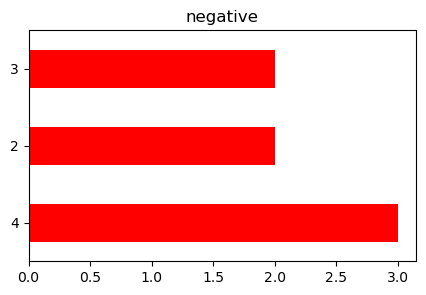

In [81]:
plt.figure(figsize=(5,3))
df_vader_neg = df.loc[df['vader_text'] == "negative", 'rating']
df_vader_neg.value_counts().plot.barh(x='vader_text', y='rating', color="red", title = "negative")

In [82]:
df.loc[(df['vader_text'] == "negative") & (df["rating"]==4), "review"]

29     The bridge or arc (kamara) is not worth dieing...
262    Have visited before but avoided lower cafe wit...
437    A wonder of nature, sadly spoiled by humans cl...
Name: review, dtype: object

In [83]:
df["sentiment_textblob"][29], df["sentiment_textblob"][262], df["sentiment_textblob"][437]

('neutral', 'neutral', 'neutral')

In [84]:
df["review"][29]

"The bridge or arc (kamara) is not worth dieing for. It seems sturdy enough but I wouldnt climb it just to take a photo on it. However, there people queuing up to risk their lives to take a photo. It's a shame because with every tourist the state of the arc worsens. Again the easy access from the road that leads to cape Greco and the proximity to Connos bay, means that the arc is no longer unspoiled"

In [85]:
df["review"][262]

'Have visited before but avoided lower cafe with busy limited facilities . Usually headed for elevated visitors pavilion further along for better facilities and stunning views. The only down side is that we thought we were vastly overcharged for poor coffee and cake .shame they should want to rip tourists off that much so bit off putting.'

In [86]:
df["review"][437]

'A wonder of nature, sadly spoiled by humans climbing all over it. It can be difficult to find as there is no signpost, but it is right next to the Marina hotel and there is a small parking just above it.'

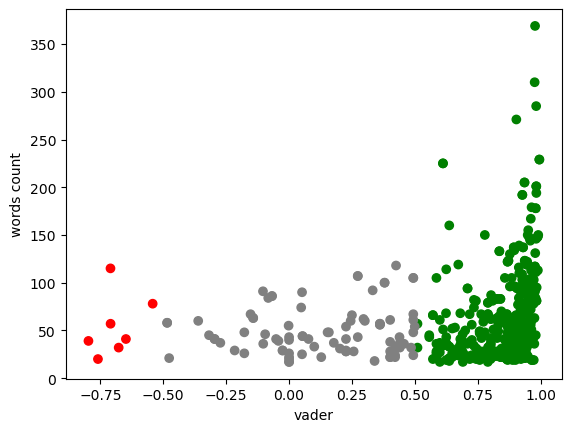

In [87]:
# vader vs words count

y_axis = df["words_count"]
x_axis = df["vader"]

fig, ax = plt.subplots()

colors = {"positive": "green", "neutral": "grey", "negative": "red"}


ax.scatter(x_axis, y_axis, c=df["vader_text"].map(colors))

plt.xlabel("vader")
plt.ylabel("words count")
plt.show()

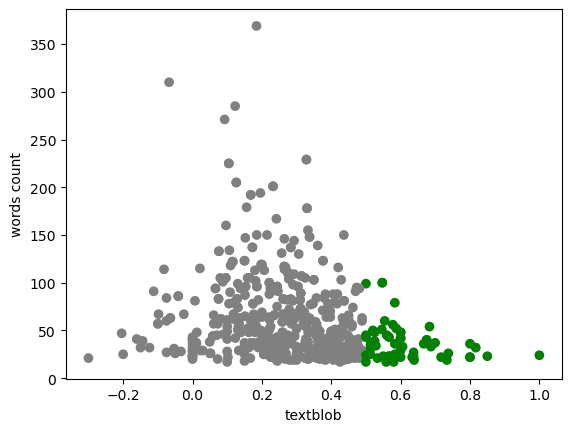

In [88]:
# vtextblob vs words count

y_axis = df["words_count"]
x_axis = df["textblob"] 

fig, ax = plt.subplots()

colors = {"positive": "green", "neutral": "grey", "negative": "red"}


ax.scatter(x_axis, y_axis, c=df["sentiment_textblob"].map(colors))

plt.xlabel("textblob")
plt.ylabel("words count")
plt.show()

**exactly the opposite classification of texblob and vader for review 29 and 262

29 - vader(negative) + textblob(positive) 
vader performed better in recognizing the true tone of the review while textblob struggles with length (reviews is rather long, 78 words)

262 - both algorithms didn't recognize rather moderate tone of the review, **subjectivity moderate

## Final conclusions

1) in most cases, Vader better recognizes the hidden positive feedback (negations, lots of negative words eg. you won't be dissapointed for Textblob is negative) than TextBlob and the distribution of scores assigned by both algorithms reflects its more moderate approach in classifying the reviews

2) long reviews (above 60 words) seem to be a challenge for TextBlob, however Vader also struggles with long reviews of high subjectivity (262 review)

# Models

## Ekman

emotion detection: sadness, happiness, contempt (disguise), fear, anger and surprise
ekman's theory about biologically based and universal for each culture and human being (same way of expression)

https://onlinelibrary.wiley.com/doi/full/10.1002/eng2.12189


In [89]:
!pip install transformers

In [90]:
from transformers import pipeline

ekman = pipeline('sentiment-analysis', model='arpanghoshal/EkmanClassifier')

emotion = ekman(str(df["review_clean"][200])) #test drive for a single row
print(emotion, type(emotion))

[{'label': 'joy', 'score': 0.902004063129425}] <class 'list'>


In [91]:
emotion[0]

{'label': 'joy', 'score': 0.902004063129425}

In [92]:
%%time

review = df["review_clean"]

def ekman_classifier(review):
    emo = ekman(review)[0]['label']
    return(emo)

df["ekman_emotion"] = df["review_clean"].apply(ekman_classifier)

df.head()

CPU times: total: 4min 51s
Wall time: 1min 16s


rating                                             review  words_count  \
0       3  Just beside the road lies this small but nice ...           34   
1       5  See it whist you can! Caused/formed by rock er...           44   
2       5  Kamara Tou Koraka is a gem in the Cape Greco F...           38   
3       5  You should not visit only for this place but i...           84   
4       3  It is a cool place to see but so many tourists...           25   

                                        review_clean  \
0  beside road lie small nice natural bridge seen...   
1  see whist causedformed rock erosion amazing si...   
2  kamara tou koraka gem cape greco family natura...   
3  visit place instead complete tour cape greko p...   
4  cool place see many tourist longer feel like n...   

                                              tokens  \
0  [beside, road, lie, small, nice, natural, brid...   
1  [see, whist, causedformed, rock, erosion, amaz...   
2  [kamara, tou, koraka, gem, cape, greco, family...   
3  [visit, place, instead, complete, tour, cape, ...   
4  [cool, place, see, many, tourist, longer, feel...   

                                                tags  \
0  [(beside, RB), (road, NN), (lie, NN), (small, ...   
1  [(see, VB), (whist, NN), (causedformed, VBN), ...   
2  [(kamara, NN), (tou, NN), (koraka, NN), (gem, ...   
3  [(visit, NN), (place, NN), (instead, RB), (com...   
4  [(cool, JJ), (place, NN), (see, VBP), (many, J...   

                                          Adjectives  \
0             [small, nice, natural, several, worth]   
1                                   [last, possible]   
2                        [natural, great, difficult]   
3  [complete, close, blue, maximum, protective, g...   
4                                       [cool, many]   

                                               Verbs                  Adverbs  \
0                                       [seen, stop]   [beside, nevertheless]   
1  [see, causedformed, amazing, saw, advised, ama...    [forever, first, ago]   
2                     [greco, preserved, find, walk]                   [well]   
3         [cave, bridge, spend, taking, walk, break]  [instead, away, really]   
4                              [see, feel, roadside]                 [longer]   

                                               Nouns  textblob  \
0  [road, lie, bridge, world, aruba, aussie, beau...     0.150   
1  [whist, rock, erosion, site, wont, year, walk,...     0.290   
2  [kamara, tou, koraka, gem, cape, family, wonde...     0.325   
3  [visit, place, tour, cape, greko, park, visit,...    -0.075   
4      [place, tourist, nature, tourist, attraction]     0.425   

   tb_subjectivity sentiment_textblob  \
0           0.3800            neutral   
1           0.6400            neutral   
2           0.7875            neutral   
3           0.4000            neutral   
4           0.5750            neutral   

                                        vader_output   vader vader_text  \
0  {'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com...  0.6124   positive   
1  {'neg': 0.0, 'neu': 0.743, 'pos': 0.257, 'comp...  0.8225   positive   
2  {'neg': 0.084, 'neu': 0.507, 'pos': 0.409, 'co...  0.8625   positive   
3  {'neg': 0.076, 'neu': 0.856, 'pos': 0.068, 'co... -0.0828    neutral   
4  {'neg': 0.0, 'neu': 0.536, 'pos': 0.464, 'comp...  0.7783   positive   

  ekman_emotion  
0           joy  
1           joy  
2           joy  
3       neutral  
4           joy

In [93]:
%%time

def emotion_score(review):
    emotion_score = ekman(review)[0]['score']
    return(emotion_score)

df["ekman_score"] = df["review_clean"].apply(emotion_score)
df.head()

CPU times: total: 4min 4s
Wall time: 1min 1s


rating                                             review  words_count  \
0       3  Just beside the road lies this small but nice ...           34   
1       5  See it whist you can! Caused/formed by rock er...           44   
2       5  Kamara Tou Koraka is a gem in the Cape Greco F...           38   
3       5  You should not visit only for this place but i...           84   
4       3  It is a cool place to see but so many tourists...           25   

                                        review_clean  \
0  beside road lie small nice natural bridge seen...   
1  see whist causedformed rock erosion amazing si...   
2  kamara tou koraka gem cape greco family natura...   
3  visit place instead complete tour cape greko p...   
4  cool place see many tourist longer feel like n...   

                                              tokens  \
0  [beside, road, lie, small, nice, natural, brid...   
1  [see, whist, causedformed, rock, erosion, amaz...   
2  [kamara, tou, koraka, gem, cape, greco, family...   
3  [visit, place, instead, complete, tour, cape, ...   
4  [cool, place, see, many, tourist, longer, feel...   

                                                tags  \
0  [(beside, RB), (road, NN), (lie, NN), (small, ...   
1  [(see, VB), (whist, NN), (causedformed, VBN), ...   
2  [(kamara, NN), (tou, NN), (koraka, NN), (gem, ...   
3  [(visit, NN), (place, NN), (instead, RB), (com...   
4  [(cool, JJ), (place, NN), (see, VBP), (many, J...   

                                          Adjectives  \
0             [small, nice, natural, several, worth]   
1                                   [last, possible]   
2                        [natural, great, difficult]   
3  [complete, close, blue, maximum, protective, g...   
4                                       [cool, many]   

                                               Verbs                  Adverbs  \
0                                       [seen, stop]   [beside, nevertheless]   
1  [see, causedformed, amazing, saw, advised, ama...    [forever, first, ago]   
2                     [greco, preserved, find, walk]                   [well]   
3         [cave, bridge, spend, taking, walk, break]  [instead, away, really]   
4                              [see, feel, roadside]                 [longer]   

                                               Nouns  textblob  \
0  [road, lie, bridge, world, aruba, aussie, beau...     0.150   
1  [whist, rock, erosion, site, wont, year, walk,...     0.290   
2  [kamara, tou, koraka, gem, cape, family, wonde...     0.325   
3  [visit, place, tour, cape, greko, park, visit,...    -0.075   
4      [place, tourist, nature, tourist, attraction]     0.425   

   tb_subjectivity sentiment_textblob  \
0           0.3800            neutral   
1           0.6400            neutral   
2           0.7875            neutral   
3           0.4000            neutral   
4           0.5750            neutral   

                                        vader_output   vader vader_text  \
0  {'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com...  0.6124   positive   
1  {'neg': 0.0, 'neu': 0.743, 'pos': 0.257, 'comp...  0.8225   positive   
2  {'neg': 0.084, 'neu': 0.507, 'pos': 0.409, 'co...  0.8625   positive   
3  {'neg': 0.076, 'neu': 0.856, 'pos': 0.068, 'co... -0.0828    neutral   
4  {'neg': 0.0, 'neu': 0.536, 'pos': 0.464, 'comp...  0.7783   positive   

  ekman_emotion  ekman_score  
0           joy     0.920967  
1           joy     0.967744  
2           joy     0.713746  
3       neutral     0.973533  
4           joy     0.668425

<Axes: >

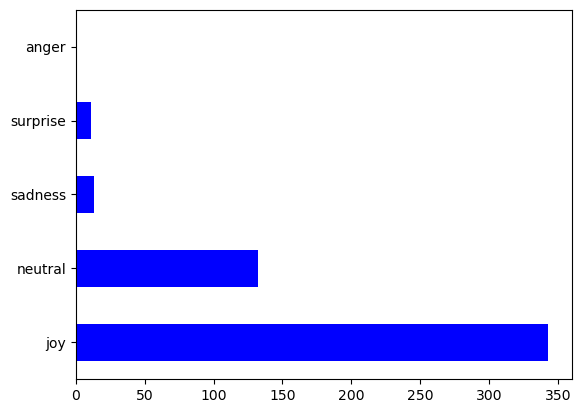

In [94]:
df["ekman_emotion"].value_counts().plot.barh(x='ekman_emotion', color="blue")

In [95]:
print(df.loc[df["ekman_emotion"] == "sadness", "review"])

30     Sadly this natural attraction is now fenced of...
31     Disappointing as the access being limited (for...
40     We were walking from the Old Chapel of Ayioi A...
128    Not quite sure I got the importance of this!! ...
176    I’m sat on the beach, looking at Aphrodite’s R...
177    Despite mythology, there is pretty much no inf...
188    Underwhelming...wouldn't recommend going out o...
312    Underwhelming...wouldn't recommend going out o...
374    What a beautiful place! Sadly you need to cros...
474    It was a nice idea once, but now it's just a r...
475    We stopped here whilst passing and glad we had...
478    The Love Bridge was quite disappointing, but t...
491    Went for a walk in the area and it is really a...
Name: review, dtype: object


## Ekman vs other outputs

Vader performed better in classifying the sentiment so it was chosen to be compared to ekman output

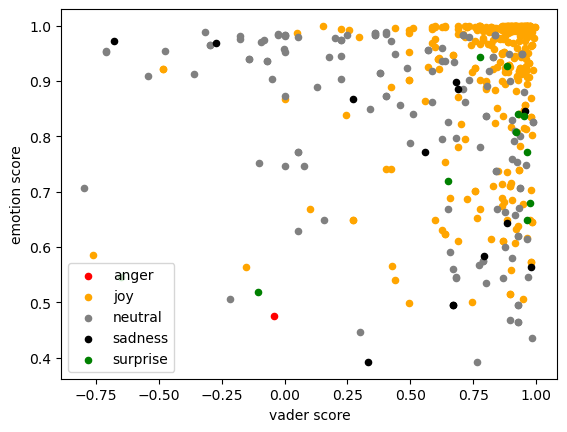

In [96]:
x_axis = df["vader"]
y_axis = df["ekman_score"]

fig, ax = plt.subplots()

colors = {"joy" : "orange", "neutral": "grey", "sadness": "black",
         "surprise": "green", "anger": "red"}


grouped = df[["vader", "ekman_score", "ekman_emotion"]].groupby('ekman_emotion')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x="vader", y="ekman_score", label=key, color=colors[key])




plt.xlabel("vader score")
plt.ylabel("emotion score")
plt.show()


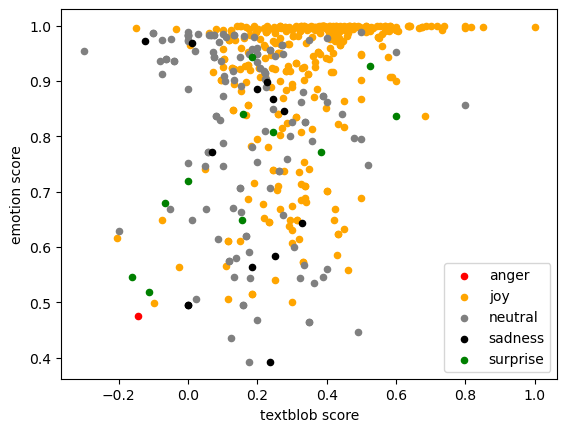

In [97]:
x_axis = df["textblob"]
y_axis = df["ekman_score"]

fig, ax = plt.subplots()

colors = {"joy" : "orange", "neutral": "grey", "sadness": "black",
         "surprise": "green", "anger": "red"}


grouped = df[["textblob", "ekman_score", "ekman_emotion"]].groupby('ekman_emotion')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x="textblob", y="ekman_score", label=key, color=colors[key])


plt.xlabel("textblob score")
plt.ylabel("emotion score")
plt.show()

No emotion is accurately reflected by Vader score - there is great concentration of 'joy points' in upper right corner (high Vader score = positive sentiment) but still they are fluctuating. That may indicate that Ekman model, due to its narrow set of emotions, **extremely simplifies the reviews.

# Transformers (BERT) for sentiment classification

https://huggingface.co/docs/transformers/main_classes/pipelines

https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english: default model for sentiment analysis pipeline in transformers library is **distilert-base-uncased

https://towardsdatascience.com/effortless-nlp-using-pre-trained-hugging-face-pipelines-with-just-3-lines-of-code-a4788d95754f (code source)

In [98]:
from transformers import pipeline

classifier = pipeline('sentiment-analysis')

#test drive for row 200
transformer_sentiment = classifier(str(df["review_clean"][200]))
print(transformer_sentiment)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'NEGATIVE', 'score': 0.8998892903327942}]


In [99]:
%%time

review = df["review_clean"]

def transformer_classifier(review):
    sentiment = classifier(review)[0]['label']
    return(sentiment)

df["transformer_sentiment_text"] = df["review_clean"].apply(transformer_classifier)

df.head()

CPU times: total: 1min 52s
Wall time: 28.4 s


rating                                             review  words_count  \
0       3  Just beside the road lies this small but nice ...           34   
1       5  See it whist you can! Caused/formed by rock er...           44   
2       5  Kamara Tou Koraka is a gem in the Cape Greco F...           38   
3       5  You should not visit only for this place but i...           84   
4       3  It is a cool place to see but so many tourists...           25   

                                        review_clean  \
0  beside road lie small nice natural bridge seen...   
1  see whist causedformed rock erosion amazing si...   
2  kamara tou koraka gem cape greco family natura...   
3  visit place instead complete tour cape greko p...   
4  cool place see many tourist longer feel like n...   

                                              tokens  \
0  [beside, road, lie, small, nice, natural, brid...   
1  [see, whist, causedformed, rock, erosion, amaz...   
2  [kamara, tou, koraka, gem, cape, greco, family...   
3  [visit, place, instead, complete, tour, cape, ...   
4  [cool, place, see, many, tourist, longer, feel...   

                                                tags  \
0  [(beside, RB), (road, NN), (lie, NN), (small, ...   
1  [(see, VB), (whist, NN), (causedformed, VBN), ...   
2  [(kamara, NN), (tou, NN), (koraka, NN), (gem, ...   
3  [(visit, NN), (place, NN), (instead, RB), (com...   
4  [(cool, JJ), (place, NN), (see, VBP), (many, J...   

                                          Adjectives  \
0             [small, nice, natural, several, worth]   
1                                   [last, possible]   
2                        [natural, great, difficult]   
3  [complete, close, blue, maximum, protective, g...   
4                                       [cool, many]   

                                               Verbs                  Adverbs  \
0                                       [seen, stop]   [beside, nevertheless]   
1  [see, causedformed, amazing, saw, advised, ama...    [forever, first, ago]   
2                     [greco, preserved, find, walk]                   [well]   
3         [cave, bridge, spend, taking, walk, break]  [instead, away, really]   
4                              [see, feel, roadside]                 [longer]   

                                               Nouns  textblob  \
0  [road, lie, bridge, world, aruba, aussie, beau...     0.150   
1  [whist, rock, erosion, site, wont, year, walk,...     0.290   
2  [kamara, tou, koraka, gem, cape, family, wonde...     0.325   
3  [visit, place, tour, cape, greko, park, visit,...    -0.075   
4      [place, tourist, nature, tourist, attraction]     0.425   

   tb_subjectivity sentiment_textblob  \
0           0.3800            neutral   
1           0.6400            neutral   
2           0.7875            neutral   
3           0.4000            neutral   
4           0.5750            neutral   

                                        vader_output   vader vader_text  \
0  {'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com...  0.6124   positive   
1  {'neg': 0.0, 'neu': 0.743, 'pos': 0.257, 'comp...  0.8225   positive   
2  {'neg': 0.084, 'neu': 0.507, 'pos': 0.409, 'co...  0.8625   positive   
3  {'neg': 0.076, 'neu': 0.856, 'pos': 0.068, 'co... -0.0828    neutral   
4  {'neg': 0.0, 'neu': 0.536, 'pos': 0.464, 'comp...  0.7783   positive   

  ekman_emotion  ekman_score transformer_sentiment_text  
0           joy     0.920967                   POSITIVE  
1           joy     0.967744                   POSITIVE  
2           joy     0.713746                   POSITIVE  
3       neutral     0.973533                   NEGATIVE  
4           joy     0.668425                   POSITIVE

In [100]:
%%time

review = df["review_clean"]

def transformer_classifier_score(review):
    sentiment = classifier(review)[0]['score']
    return(sentiment)

df["transformer_sentiment_score"] = df["review_clean"].apply(transformer_classifier_score)

df.head()

CPU times: total: 1min 51s
Wall time: 28.3 s


rating                                             review  words_count  \
0       3  Just beside the road lies this small but nice ...           34   
1       5  See it whist you can! Caused/formed by rock er...           44   
2       5  Kamara Tou Koraka is a gem in the Cape Greco F...           38   
3       5  You should not visit only for this place but i...           84   
4       3  It is a cool place to see but so many tourists...           25   

                                        review_clean  \
0  beside road lie small nice natural bridge seen...   
1  see whist causedformed rock erosion amazing si...   
2  kamara tou koraka gem cape greco family natura...   
3  visit place instead complete tour cape greko p...   
4  cool place see many tourist longer feel like n...   

                                              tokens  \
0  [beside, road, lie, small, nice, natural, brid...   
1  [see, whist, causedformed, rock, erosion, amaz...   
2  [kamara, tou, koraka, gem, cape, greco, family...   
3  [visit, place, instead, complete, tour, cape, ...   
4  [cool, place, see, many, tourist, longer, feel...   

                                                tags  \
0  [(beside, RB), (road, NN), (lie, NN), (small, ...   
1  [(see, VB), (whist, NN), (causedformed, VBN), ...   
2  [(kamara, NN), (tou, NN), (koraka, NN), (gem, ...   
3  [(visit, NN), (place, NN), (instead, RB), (com...   
4  [(cool, JJ), (place, NN), (see, VBP), (many, J...   

                                          Adjectives  \
0             [small, nice, natural, several, worth]   
1                                   [last, possible]   
2                        [natural, great, difficult]   
3  [complete, close, blue, maximum, protective, g...   
4                                       [cool, many]   

                                               Verbs                  Adverbs  \
0                                       [seen, stop]   [beside, nevertheless]   
1  [see, causedformed, amazing, saw, advised, ama...    [forever, first, ago]   
2                     [greco, preserved, find, walk]                   [well]   
3         [cave, bridge, spend, taking, walk, break]  [instead, away, really]   
4                              [see, feel, roadside]                 [longer]   

                                               Nouns  textblob  \
0  [road, lie, bridge, world, aruba, aussie, beau...     0.150   
1  [whist, rock, erosion, site, wont, year, walk,...     0.290   
2  [kamara, tou, koraka, gem, cape, family, wonde...     0.325   
3  [visit, place, tour, cape, greko, park, visit,...    -0.075   
4      [place, tourist, nature, tourist, attraction]     0.425   

   tb_subjectivity sentiment_textblob  \
0           0.3800            neutral   
1           0.6400            neutral   
2           0.7875            neutral   
3           0.4000            neutral   
4           0.5750            neutral   

                                        vader_output   vader vader_text  \
0  {'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com...  0.6124   positive   
1  {'neg': 0.0, 'neu': 0.743, 'pos': 0.257, 'comp...  0.8225   positive   
2  {'neg': 0.084, 'neu': 0.507, 'pos': 0.409, 'co...  0.8625   positive   
3  {'neg': 0.076, 'neu': 0.856, 'pos': 0.068, 'co... -0.0828    neutral   
4  {'neg': 0.0, 'neu': 0.536, 'pos': 0.464, 'comp...  0.7783   positive   

  ekman_emotion  ekman_score transformer_sentiment_text  \
0           joy     0.920967                   POSITIVE   
1           joy     0.967744                   POSITIVE   
2           joy     0.713746                   POSITIVE   
3       neutral     0.973533                   NEGATIVE   
4           joy     0.668425                   POSITIVE   

   transformer_sentiment_score  
0                     0.999319  
1                     0.988294  
2                     0.997766  
3                     0.964123  
4                     0.998542

In [101]:
df.transformer_sentiment_text = df.transformer_sentiment_text.apply(str.lower)
df.head()

rating                                             review  words_count  \
0       3  Just beside the road lies this small but nice ...           34   
1       5  See it whist you can! Caused/formed by rock er...           44   
2       5  Kamara Tou Koraka is a gem in the Cape Greco F...           38   
3       5  You should not visit only for this place but i...           84   
4       3  It is a cool place to see but so many tourists...           25   

                                        review_clean  \
0  beside road lie small nice natural bridge seen...   
1  see whist causedformed rock erosion amazing si...   
2  kamara tou koraka gem cape greco family natura...   
3  visit place instead complete tour cape greko p...   
4  cool place see many tourist longer feel like n...   

                                              tokens  \
0  [beside, road, lie, small, nice, natural, brid...   
1  [see, whist, causedformed, rock, erosion, amaz...   
2  [kamara, tou, koraka, gem, cape, greco, family...   
3  [visit, place, instead, complete, tour, cape, ...   
4  [cool, place, see, many, tourist, longer, feel...   

                                                tags  \
0  [(beside, RB), (road, NN), (lie, NN), (small, ...   
1  [(see, VB), (whist, NN), (causedformed, VBN), ...   
2  [(kamara, NN), (tou, NN), (koraka, NN), (gem, ...   
3  [(visit, NN), (place, NN), (instead, RB), (com...   
4  [(cool, JJ), (place, NN), (see, VBP), (many, J...   

                                          Adjectives  \
0             [small, nice, natural, several, worth]   
1                                   [last, possible]   
2                        [natural, great, difficult]   
3  [complete, close, blue, maximum, protective, g...   
4                                       [cool, many]   

                                               Verbs                  Adverbs  \
0                                       [seen, stop]   [beside, nevertheless]   
1  [see, causedformed, amazing, saw, advised, ama...    [forever, first, ago]   
2                     [greco, preserved, find, walk]                   [well]   
3         [cave, bridge, spend, taking, walk, break]  [instead, away, really]   
4                              [see, feel, roadside]                 [longer]   

                                               Nouns  textblob  \
0  [road, lie, bridge, world, aruba, aussie, beau...     0.150   
1  [whist, rock, erosion, site, wont, year, walk,...     0.290   
2  [kamara, tou, koraka, gem, cape, family, wonde...     0.325   
3  [visit, place, tour, cape, greko, park, visit,...    -0.075   
4      [place, tourist, nature, tourist, attraction]     0.425   

   tb_subjectivity sentiment_textblob  \
0           0.3800            neutral   
1           0.6400            neutral   
2           0.7875            neutral   
3           0.4000            neutral   
4           0.5750            neutral   

                                        vader_output   vader vader_text  \
0  {'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com...  0.6124   positive   
1  {'neg': 0.0, 'neu': 0.743, 'pos': 0.257, 'comp...  0.8225   positive   
2  {'neg': 0.084, 'neu': 0.507, 'pos': 0.409, 'co...  0.8625   positive   
3  {'neg': 0.076, 'neu': 0.856, 'pos': 0.068, 'co... -0.0828    neutral   
4  {'neg': 0.0, 'neu': 0.536, 'pos': 0.464, 'comp...  0.7783   positive   

  ekman_emotion  ekman_score transformer_sentiment_text  \
0           joy     0.920967                   positive   
1           joy     0.967744                   positive   
2           joy     0.713746                   positive   
3       neutral     0.973533                   negative   
4           joy     0.668425                   positive   

   transformer_sentiment_score  
0                     0.999319  
1                     0.988294  
2                     0.997766  
3                     0.964123  
4                     0.998542

<Axes: xlabel='transformer_sentiment_text', ylabel='count'>

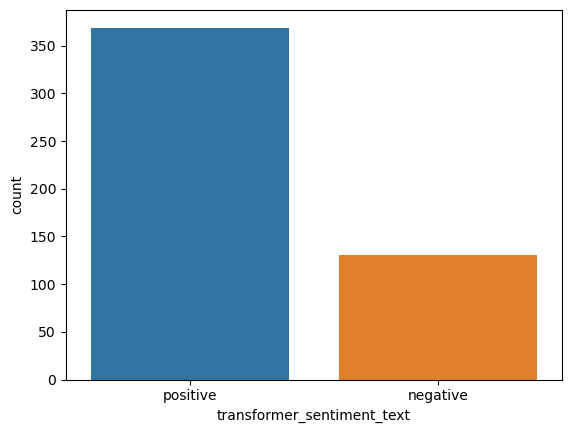

In [102]:
sns.countplot(data = df, x= df.transformer_sentiment_text)

In [103]:
df["transformer_sentiment_text"].value_counts()

positive    369
negative    131
Name: transformer_sentiment_text, dtype: int64

In [104]:
df.transformer_sentiment_score.describe()

count    500.000000
mean       0.952716
std        0.100854
min        0.500064
25%        0.967518
50%        0.995323
75%        0.999198
max        0.999879
Name: transformer_sentiment_score, dtype: float64

In [105]:
df["transformer_sentiment_score"] = df["transformer_sentiment_score"].mask(df["transformer_sentiment_text"].eq("negative"), 
                                                                           -df["transformer_sentiment_score"])

In [106]:
df["transformer_sentiment_score"]

0      0.999319
1      0.988294
2      0.997766
3     -0.964123
4      0.998542
         ...   
495   -0.989305
496    0.999742
497    0.999680
498    0.986307
499    0.997954
Name: transformer_sentiment_score, Length: 500, dtype: float64

<Axes: xlabel='value', ylabel='Count'>

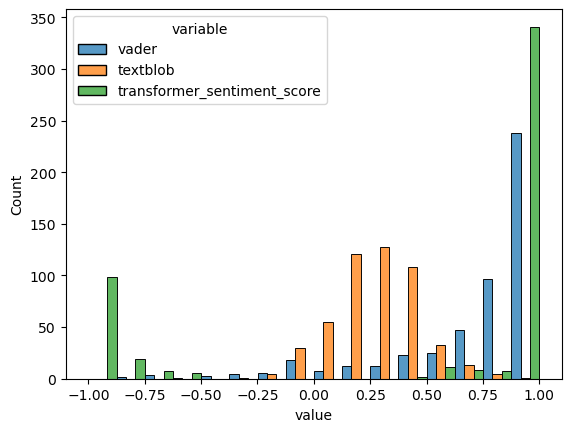

In [107]:
# bert does not have neutral label so it's better to compare numerical outputs (scores)

df_methods = df[["vader", "textblob", "transformer_sentiment_score"]]

sns.histplot(df_methods.melt(), x='value', hue='variable',
             multiple='dodge')

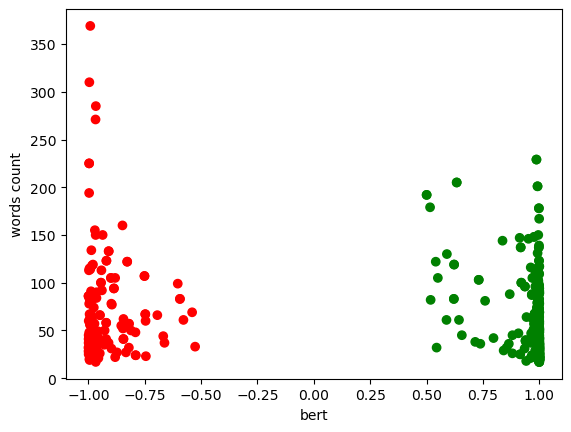

In [108]:
y_axis = df["words_count"]
x_axis = df["transformer_sentiment_score"] 

fig, ax = plt.subplots()

colors = {"positive": "green", "neutral": "grey", "negative": "red"}


ax.scatter(x_axis, y_axis, c=df["transformer_sentiment_text"].map(colors))

plt.xlabel("bert")
plt.ylabel("words count")
plt.show()

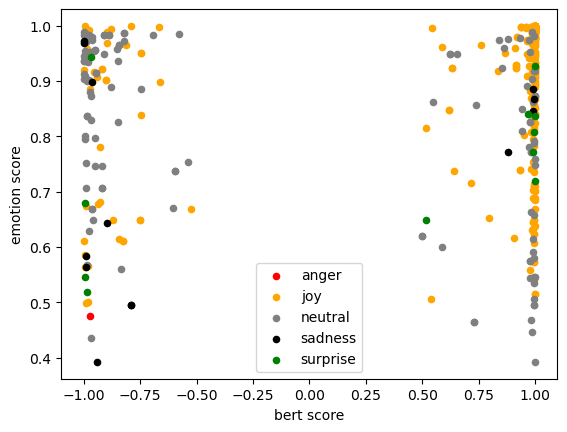

In [109]:
x_axis = df["transformer_sentiment_score"]
y_axis = df["ekman_score"]

fig, ax = plt.subplots()

colors = {"joy" : "orange", "neutral": "grey", "sadness": "black",
         "surprise": "green", "anger": "red"}


grouped = df[["transformer_sentiment_score", "ekman_score", "ekman_emotion"]].groupby('ekman_emotion')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x="transformer_sentiment_score", y="ekman_score", label=key, color=colors[key])


plt.xlabel("bert score")
plt.ylabel("emotion score")
plt.show()

<Axes: title={'center': 'bert positive vs rating'}>

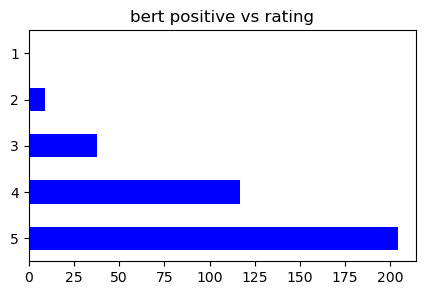

In [110]:
#bert vs rating marks

plt.figure(figsize=(5,3))

df_bert_pos = df.loc[df['transformer_sentiment_text'] == "positive", 'rating']
df_bert_pos.value_counts().plot.barh(x='index', y='rating', color="blue", title = "bert positive vs rating")

<Axes: title={'center': 'bert negative vs rating'}>

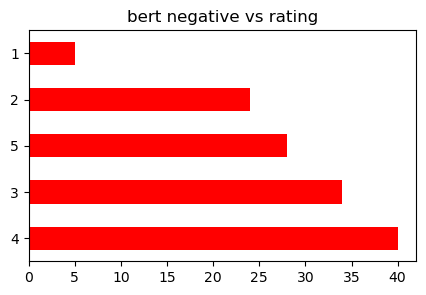

In [111]:
plt.figure(figsize=(5,3))

df_bert_neg = df.loc[df['transformer_sentiment_text'] == "negative", 'rating']
df_bert_neg.value_counts().plot.barh(x='index', y='rating', color="red", title = "bert negative vs rating")

Results of positive label vs rating plot are expected, however the largest group of negatively marked reviews are supported with the second highest rating grade.

In [112]:
df.loc[(df['transformer_sentiment_text'] == "negative") & (df["rating"]==4), "review"]

10     If you have a rental car this is a place to vi...
19     It's right off the road but you need to walk t...
20     I suppose in nicer weather may be better but f...
27     The Stone Arch is a wonder of nature. The feel...
29     The bridge or arc (kamara) is not worth dieing...
32     Natural sand stone/ Calcite rock Arch formed b...
39     Awesome natural arch rock formation. You bette...
66     the bridge is close to the shore, and although...
73     This coastal feature shows how the coastline h...
84     A great drive out on a coastal road to see Aph...
144    Amazing views from the top of the rock and fre...
149    Worth the short trip,took the public bus ,whic...
150    Some nice looking rocks but I really don't get...
157    Since a lot of the island's charm is linked to...
160    A better than average Cypriot photo opportunit...
170    We went as we were going to be in the area, we...
176    I’m sat on the beach, looking at Aphrodite’s R...
193    The site is located from

In [113]:
df.columns.get_loc("transformer_sentiment_score")

19

In [114]:
df.columns.get_loc("textblob")

10

In [115]:
df.columns.get_loc("vader")

14

In [116]:
df.columns.get_loc("vader_text")

15

In [117]:
df.columns.get_loc("transformer_sentiment_text")

18

In [118]:
df.columns.get_loc("sentiment_textblob")

12

## 40 reviews with rating 4 negative for BERT

comparing the output of BERT with TextBlob and Vader

In [119]:
algorithms = df.iloc[[10, 19, 20, 27, 29, 32, 39, 66, 73, 84, 144, 149, 150,
                      157, 160, 170, 176, 193, 203, 221, 228, 235, 236, 245,
                      250, 262, 271, 287, 289, 320, 322, 327, 343, 362, 375,
                      399, 424, 437, 486, 490],[10,12, 14, 15,18, 19]]
algorithms

textblob sentiment_textblob   vader vader_text  \
10   0.332812            neutral  0.9509   positive   
19   0.230519            neutral  0.6908   positive   
20   0.500000           positive  0.6249   positive   
27   0.320833            neutral  0.8225   positive   
29   0.105208            neutral -0.5423   negative   
32  -0.143750            neutral -0.0423    neutral   
39   0.406667            neutral  0.8689   positive   
66   0.183333            neutral -0.0018    neutral   
73   0.162500            neutral -0.1779    neutral   
84   0.220000            neutral  0.8225   positive   
144  0.416667            neutral  0.9723   positive   
149  0.081944            neutral  0.8020   positive   
150  0.133333            neutral -0.4847    neutral   
157  0.122905            neutral  0.9824   positive   
160  0.130556            neutral  0.9337   positive   
170  0.197619            neutral  0.6728   positive   
176  0.184481            neutral  0.9780   positive   
193  0.076190            neutral  0.8360   positive   
203  0.314286            neutral  0.2732    neutral   
221  0.104622            neutral  0.6119   positive   
228  0.116146            neutral  0.8689   positive   
235  0.235714            neutral  0.5719   positive   
236  0.261508            neutral  0.8402   positive   
245 -0.082143            neutral  0.6249   positive   
250  0.200000            neutral  0.9256   positive   
262  0.072321            neutral -0.7096   negative   
271 -0.025000            neutral -0.1531    neutral   
287  0.081944            neutral  0.8020   positive   
289  0.133333            neutral -0.4847    neutral   
320 -0.097917            neutral  0.4939    neutral   
322  0.076190            neutral  0.8360   positive   
327  0.000000            neutral  0.7096   positive   
343  0.314286            neutral  0.2732    neutral   
362  0.104622            neutral  0.6119   positive   
375  0.116146            neutral  0.8689   positive   
399 -0.075000            neutral  0.5994   positive   
424  0.333333            neutral  0.7724   positive   
437 -0.160714            neutral -0.6486   negative   
486  0.140000            neutral  0.1531    neutral   
490  0.000000            neutral  0.0000    neutral   

    transformer_sentiment_text  transformer_sentiment_score  
10                    negative                    -0.971150  
19                    negative                    -0.929464  
20                    negative                    -0.995442  
27                    negative                    -0.844345  
29                    negative                    -0.996389  
32                    negative                    -0.972537  
39                    negative                    -0.994348  
66                    negative                    -0.854165  
73                    negative                    -0.995987  
84                    negative                    -0.811127  
144                   negative                    -0.898215  
149                   negative                    -0.985249  
150                   negative                    -0.920952  
157                   negative                    -0.966879  
160                   negative                    -0.603619  
170                   negative                    -0.979577  
176                   negative                    -0.991512  
193                   negative                    -0.909824  
203                   negative                    -0.751239  
221                   negative                    -0.996517  
228                   negative                    -0.827801  
235                   negative                    -0.948777  
236                   negative                    -0.593963  
245                   negative                    -0.991598  
250                   negative                    -0.539891  
262                   negative                    -0.972797  
271                   negative                    -0.994643  
287          

<Axes: >

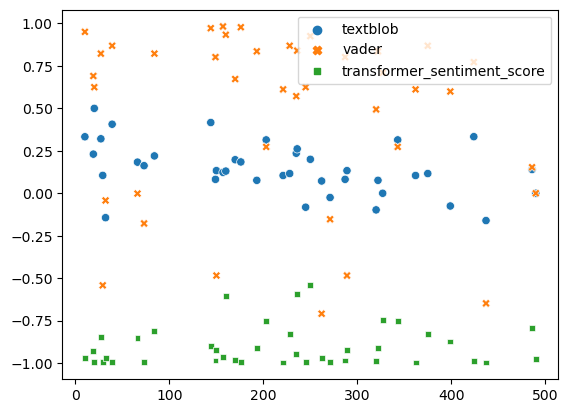

In [120]:
sns.scatterplot(data = algorithms)

<Axes: >

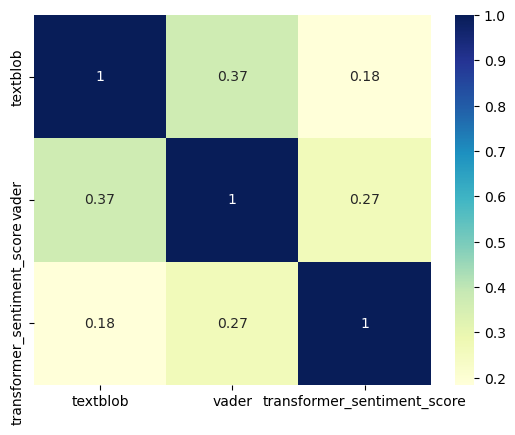

In [121]:
sns.heatmap(algorithms.corr(), cmap="YlGnBu", annot=True)

In [122]:
bert_40_scores = algorithms.transformer_sentiment_score
textblob_40_scores = algorithms.textblob
vader_40_scores = algorithms.vader

algorithms['scores_match_bert_textblob'] = np.where( bert_40_scores == textblob_40_scores, 'True', 'False')
algorithms

textblob sentiment_textblob   vader vader_text  \
10   0.332812            neutral  0.9509   positive   
19   0.230519            neutral  0.6908   positive   
20   0.500000           positive  0.6249   positive   
27   0.320833            neutral  0.8225   positive   
29   0.105208            neutral -0.5423   negative   
32  -0.143750            neutral -0.0423    neutral   
39   0.406667            neutral  0.8689   positive   
66   0.183333            neutral -0.0018    neutral   
73   0.162500            neutral -0.1779    neutral   
84   0.220000            neutral  0.8225   positive   
144  0.416667            neutral  0.9723   positive   
149  0.081944            neutral  0.8020   positive   
150  0.133333            neutral -0.4847    neutral   
157  0.122905            neutral  0.9824   positive   
160  0.130556            neutral  0.9337   positive   
170  0.197619            neutral  0.6728   positive   
176  0.184481            neutral  0.9780   positive   
193  0.076190            neutral  0.8360   positive   
203  0.314286            neutral  0.2732    neutral   
221  0.104622            neutral  0.6119   positive   
228  0.116146            neutral  0.8689   positive   
235  0.235714            neutral  0.5719   positive   
236  0.261508            neutral  0.8402   positive   
245 -0.082143            neutral  0.6249   positive   
250  0.200000            neutral  0.9256   positive   
262  0.072321            neutral -0.7096   negative   
271 -0.025000            neutral -0.1531    neutral   
287  0.081944            neutral  0.8020   positive   
289  0.133333            neutral -0.4847    neutral   
320 -0.097917            neutral  0.4939    neutral   
322  0.076190            neutral  0.8360   positive   
327  0.000000            neutral  0.7096   positive   
343  0.314286            neutral  0.2732    neutral   
362  0.104622            neutral  0.6119   positive   
375  0.116146            neutral  0.8689   positive   
399 -0.075000            neutral  0.5994   positive   
424  0.333333            neutral  0.7724   positive   
437 -0.160714            neutral -0.6486   negative   
486  0.140000            neutral  0.1531    neutral   
490  0.000000            neutral  0.0000    neutral   

    transformer_sentiment_text  transformer_sentiment_score  \
10                    negative                    -0.971150   
19                    negative                    -0.929464   
20                    negative                    -0.995442   
27                    negative                    -0.844345   
29                    negative                    -0.996389   
32                    negative                    -0.972537   
39                    negative                    -0.994348   
66                    negative                    -0.854165   
73                    negative                    -0.995987   
84                    negative                    -0.811127   
144                   negative                    -0.898215   
149                   negative                    -0.985249   
150                   negative                    -0.920952   
157                   negative                    -0.966879   
160                   negative                    -0.603619   
170                   negative                    -0.979577   
176                   negative                    -0.991512   
193                   negative                    -0.909824   
203                   negative                    -0.751239   
221                   negative                    -0.996517   
228                   negative                    -0.827801   
235                   negative                    -0.948777   
236                   negative                    -0.593963   
245                   negative                    -0.991598   
250                   negative                    -0.539891   
262                   negative                    -0.972797   
271                   negative                  

In [123]:
algorithms.scores_match_bert_textblob.describe()

count        40
unique        1
top       False
freq         40
Name: scores_match_bert_textblob, dtype: object

In [124]:
algorithms['scores_match_bert_vader'] = np.where( bert_40_scores == vader_40_scores, 'True', 'False')
algorithms.scores_match_bert_vader.describe()

count        40
unique        1
top       False
freq         40
Name: scores_match_bert_vader, dtype: object

In [125]:
algorithms['scores_match_textblob_vader'] = np.where( textblob_40_scores == vader_40_scores, 'True', 'False')
algorithms.scores_match_textblob_vader.describe()

count        40
unique        2
top       False
freq         39
Name: scores_match_textblob_vader, dtype: object

## Intervals of scores for 40 reviews

they are standarized between -1 as minimum and 1 as maximum

value of each column falls within its respective interval and the output is new dataframe that represents the frequency of values within intervals for each column. 

In [126]:
#interval_size = 0.2

interval_size = 0.25

df = algorithms[["textblob", "vader", "transformer_sentiment_score"]]

interval_25 = pd.DataFrame()
for col in df.columns:
    intervals = pd.interval_range(start=(-1), end=1, freq=interval_size)
    counts = pd.cut(df[col], bins=intervals).value_counts(sort=False)
    interval_25[col] = counts

print(interval_25)

               textblob  vader  transformer_sentiment_score
(-1.0, -0.75]         0      0                           36
(-0.75, -0.5]         0      3                            4
(-0.5, -0.25]         0      2                            0
(-0.25, 0.0]          8      5                            0
(0.0, 0.25]          23      1                            0
(0.25, 0.5]           9      3                            0
(0.5, 0.75]           0      9                            0
(0.75, 1.0]           0     17                            0


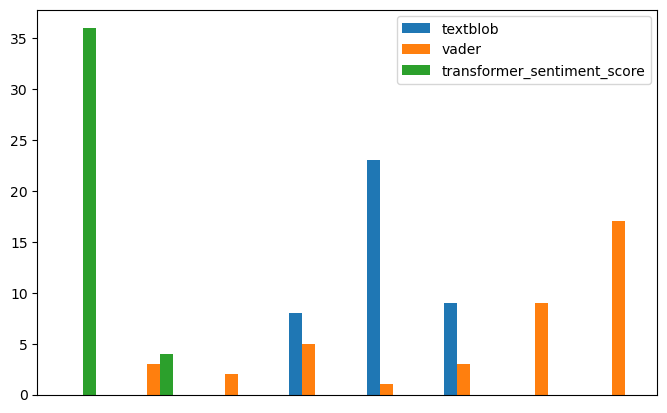

In [127]:
plt.rcParams["figure.figsize"] = (8, 5)

ax = interval_25.plot(kind = "bar")
plt.xticks([], [])
ax.set_xticks([])
ax.set_xticks([], minor=True)
plt.show()

In [128]:
corr_coef = np.corrcoef(algorithms["transformer_sentiment_score"], algorithms["vader"])[0,1]
print(f"Bert is {corr_coef * 100:.0f}% similar to Vader based on correlation")

Bert is 27% similar to Vader based on correlation


In [129]:
corr_coef = np.corrcoef(algorithms["transformer_sentiment_score"], algorithms["textblob"])[0,1]
print(f"Bert is {corr_coef * 100:.0f}% similar to TextBlob based on correlation")

Bert is 18% similar to TextBlob based on correlation


In [130]:
corr_coef = np.corrcoef(algorithms["textblob"], algorithms["vader"])[0,1]
print(f"TextBlob is {corr_coef * 100:.0f}% similar to Vader based on correlation")

TextBlob is 37% similar to Vader based on correlation


In [131]:
interval_size = 0.2

df = algorithms[["textblob", "vader", "transformer_sentiment_score"]]

interval_2 = pd.DataFrame()
for col in df.columns:
    intervals = pd.interval_range(start=(-1), end=1, freq=interval_size)
    counts = pd.cut(df[col], bins=intervals).value_counts(sort=False)
    interval_2[col] = counts

print(interval_2)

                                              textblob  vader  \
(-1.0, -0.775]                                       0      0   
(-0.775, -0.55]                                      0      2   
(-0.55, -0.32499999999999996]                        0      3   
(-0.32499999999999996, -0.09999999999999998]         2      2   
(-0.09999999999999998, 0.125]                       17      3   
(0.125, 0.3500000000000001]                         18      3   
(0.3500000000000001, 0.575]                          3      2   
(0.575, 0.8]                                         0      9   

                                              transformer_sentiment_score  
(-1.0, -0.775]                                                         34  
(-0.775, -0.55]                                                         5  
(-0.55, -0.32499999999999996]                                           1  
(-0.32499999999999996, -0.09999999999999998]                            0  
(-0.09999999999999998, 0.125]     

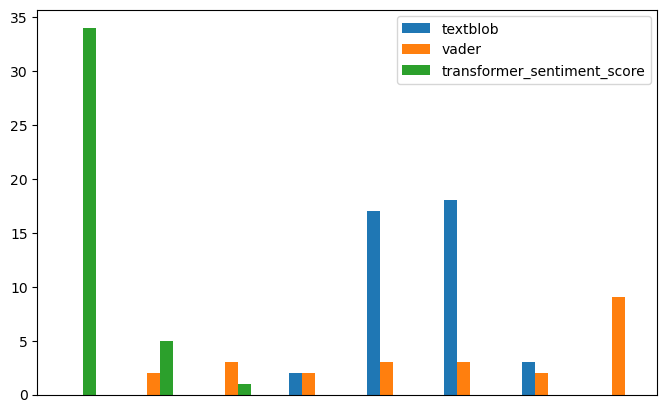

In [132]:
plt.rcParams["figure.figsize"] = (8, 5)

ax = interval_2.plot(kind = "bar")
plt.xticks([], [])
ax.set_xticks([])
ax.set_xticks([], minor=True)
plt.show()

In [121]:
!pip install fuzzywuzzy

In [122]:
from fuzzywuzzy import process, fuzz

In [135]:
# fuzzy for labels for 40 reviews of rating 4 negative for BERT

bert_40 = str(algorithms.transformer_sentiment_text)
textblob_40 = str(algorithms.sentiment_textblob)
vader_40 = str(algorithms.vader_text)

bert_textblob = fuzz.ratio(bert_40, textblob_40)
bert_vader = fuzz.ratio(bert_40, vader_40)
vader_textblob = fuzz.ratio(vader_40, textblob_40)

print(f"Bert vs TextBlob: {bert_textblob}% \nBert vs Vader: {bert_vader}% \nVader vs TextBlob: {vader_textblob}%")


Bert vs TextBlob: 20% 
Bert vs Vader: 10% 
Vader vs TextBlob: 5%


1) scores - BERT vs TextBlob and BERT vs Vader in all 40 cases match = False while TextBlob vs Vader agreed in 1 case out of 40

2) labels - Vader and TextBlob present quite high similarity (because of neutral label), the pairs with Bert are consequently less similar to each other

## Overall methods comparison

### Labels similarity

Labels are expected to be more similar than scores

In [118]:
df_text = df[["transformer_sentiment_text", "sentiment_textblob", "vader_text"]]
df_text

transformer_sentiment_text sentiment_textblob vader_text
0                     positive            neutral   positive
1                     positive            neutral   positive
2                     positive            neutral   positive
3                     negative            neutral    neutral
4                     positive            neutral   positive
..                         ...                ...        ...
495                   negative            neutral   positive
496                   positive           positive   positive
497                   positive            neutral   positive
498                   positive            neutral   positive
499                   positive            neutral    neutral

[500 rows x 3 columns]

In [119]:
df_text = df_text.apply(pd.Series.value_counts)
df_text

transformer_sentiment_text  sentiment_textblob  vader_text
negative                       131.0                 NaN           7
neutral                          NaN               441.0          86
positive                       369.0                59.0         407

This ratio uses a simple technique which involves calculating the edit distance (Levenshtein distance) between two strings. The unique feature of ‘fuzz.ratio’ lies in the fact that it takes into consideration minimal differences existing between both strings

https://www.jashds.com/blog/2019/05/13/fuzzy-stringmatching-python#:~:text=This%20ratio%20uses%20a%20simple,differences%20existing%20between%20both%20strings.

In [125]:


bert_labels = str(df.transformer_sentiment_text)
textblob_labels = str(df.sentiment_textblob)
vader_labels = str(df.vader_text)

bert_textblob = fuzz.ratio(bert_labels, textblob_labels)
bert_vader = fuzz.ratio(bert_labels, vader_labels)
vader_textblob = fuzz.ratio(vader_labels, textblob_labels)

print(f"Bert vs TextBlob: {bert_textblob}% \nBert vs Vader: {bert_vader}% \nVader vs TextBlob: {vader_textblob}%")

Bert vs TextBlob: 34% 
Bert vs Vader: 61% 
Vader vs TextBlob: 20%


### Scores similarity

In [126]:
df['scores_match_bert_vader'] = np.where( df.transformer_sentiment_score == df.vader, 'True', 'False')
df['scores_match_bert_vader'].describe()

count       500
unique        1
top       False
freq        500
Name: scores_match_bert_vader, dtype: object

In [127]:
df['scores_match_bert_textblob'] = np.where( df.transformer_sentiment_score == df.sentiment_textblob, 'True', 'False')
df['scores_match_bert_textblob'].describe()

count       500
unique        1
top       False
freq        500
Name: scores_match_bert_textblob, dtype: object

In [128]:
df['scores_match_textblob_vader'] = np.where( df.sentiment_textblob == df.vader, 'True', 'False')
df['scores_match_textblob_vader'].describe()

count       500
unique        1
top       False
freq        500
Name: scores_match_textblob_vader, dtype: object

### Scores similarity intervals

In [129]:
df_scores = df[["transformer_sentiment_score", "textblob", "vader"]]
df_scores

transformer_sentiment_score  textblob   vader
0                       0.999319  0.150000  0.6124
1                       0.988294  0.290000  0.8225
2                       0.997766  0.325000  0.8625
3                      -0.964123 -0.075000 -0.0828
4                       0.998542  0.425000  0.7783
..                           ...       ...     ...
495                    -0.989305  0.300000  0.8658
496                     0.999742  0.525000  0.8860
497                     0.999680  0.190000  0.9022
498                     0.986307  0.265247  0.9690
499                     0.997954  0.300000  0.4215

[500 rows x 3 columns]

In [130]:
interval_size = 0.2

interval_25_all = pd.DataFrame()
for col in df_scores.columns:
    intervals = pd.interval_range(start=(-1), end=1, freq=interval_size)
    counts = pd.cut(df_scores[col], bins=intervals).value_counts(sort=False)
    interval_25_all[col] = counts

print(interval_25_all)

                                              transformer_sentiment_score  \
(-1.0, -0.775]                                                        116   
(-0.775, -0.55]                                                        13   
(-0.55, -0.32499999999999996]                                           2   
(-0.32499999999999996, -0.09999999999999998]                            0   
(-0.09999999999999998, 0.125]                                           0   
(0.125, 0.3500000000000001]                                             0   
(0.3500000000000001, 0.575]                                             7   
(0.575, 0.8]                                                           16   

                                              textblob  vader  
(-1.0, -0.775]                                       0      1  
(-0.775, -0.55]                                      0      5  
(-0.55, -0.32499999999999996]                        0      5  
(-0.32499999999999996, -0.09999999999999998]      

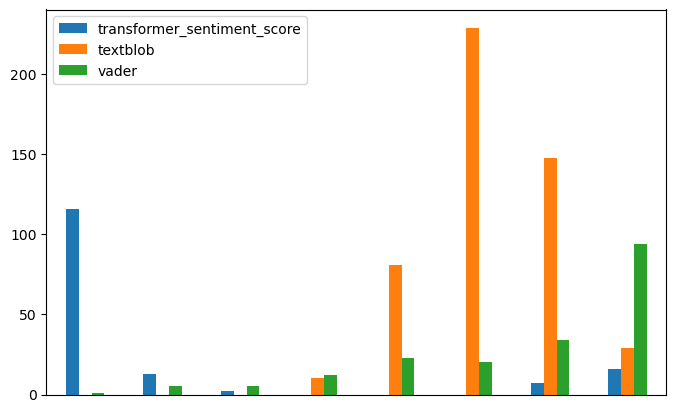

In [131]:
plt.rcParams["figure.figsize"] = (8, 5)
ax = interval_25_all.plot(kind = "bar")
plt.xticks([], [])
ax.set_xticks([])
ax.set_xticks([], minor=True)
plt.show()

## Overall coef 

In [132]:
corr_coef = np.corrcoef(df_scores["transformer_sentiment_score"], df_scores["vader"])[0,1]
print(f"Bert is {corr_coef * 100:.0f}% similar to Vader based on correlation")

Bert is 51% similar to Vader based on correlation


In [133]:
corr_coef = np.corrcoef(df_scores["transformer_sentiment_score"], df_scores["textblob"])[0,1]
print(f"Bert is {corr_coef * 100:.0f}% similar to TextBlob based on correlation")

Bert is 49% similar to TextBlob based on correlation


In [134]:
corr_coef = np.corrcoef(df_scores["vader"], df_scores["textblob"])[0,1]
print(f"Vader is {corr_coef * 100:.0f}% similar to TextBlob based on correlation")

Vader is 43% similar to TextBlob based on correlation


# Exploring the surprise review

In [123]:
df.loc[(df['ekman_emotion'] == "anger"), "review"]

32    Natural sand stone/ Calcite rock Arch formed b...
Name: review, dtype: object

In [ ]:
df.review[32]

In [ ]:
df["vader_text"][32]

In [ ]:
 df["sentiment_textblob"][32]

In [ ]:
df["transformer_sentiment_text"][32]

In [ ]:
len(df.loc[(df['ekman_emotion'] == "surprise"), "review"])

In [ ]:
df.loc[(df['ekman_emotion'] == "surprise"), "review"]

In [ ]:
df.columns.get_loc("vader_text")

In [ ]:
df.columns.get_loc("sentiment_textblob")

In [ ]:
df.columns.get_loc("transformer_sentiment_text")

In [ ]:
df.iloc[[44, 92, 97, 178, 260, 437, 441, 465, 481, 485, 496],[12, 15, 16 ]]

In [ ]:
df["review"][260]

In [ ]:
df["review"][437]

In [ ]:
df["review"][441]

In [ ]:
df["review"][465]

In [ ]:
df["review"][485]

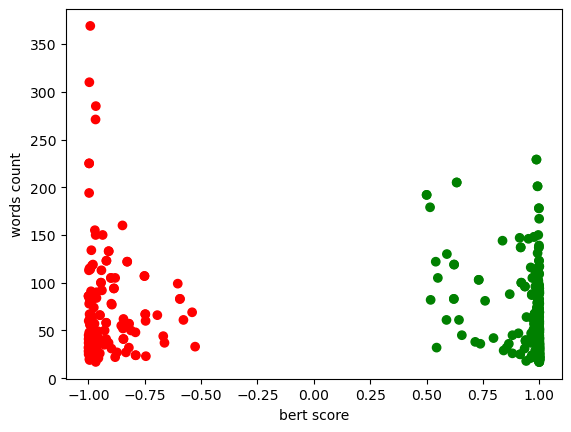

In [124]:
# checking how bert sentiment is related to review length

x_axis = df["transformer_sentiment_score"]
y_axis = df["words_count"]

fig, ax = plt.subplots()

colors = {"positive": "green", "negative": "red"}


ax.scatter(x_axis, y_axis, c=df["transformer_sentiment_text"].map(colors))

plt.xlabel("bert score")
plt.ylabel("words count")
plt.show()